<a href="https://colab.research.google.com/github/ShraddhaSharma24/Machine-learning/blob/main/Credit_card_fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
organizations_mlg_ulb_creditcardfraud_path = kagglehub.dataset_download('organizations/mlg-ulb/creditcardfraud')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.duplicated().any()

True

In [ ]:
df_new=df.drop_duplicates()

In [ ]:
df_new.shape

(283726, 31)

In [ ]:
df_new['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Class'>

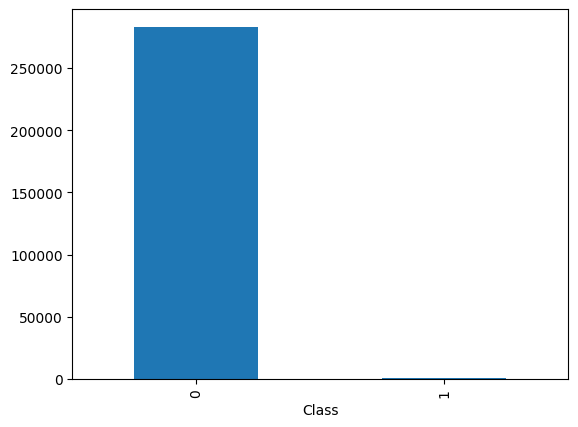

In [ ]:
df_new['Class'].value_counts().plot(kind='bar')

In [ ]:
fraud,legitimate=df_new['Class'].value_counts()
print(f"Fraud Transaction(0) : {fraud}")
print(f"Legitimate Transaction(0) : {legitimate}")
print(f"This is imbalance data")

Fraud Transaction(0) : 283253
Legitimate Transaction(0) : 473
This is imbalance data


In [ ]:
fraud=df_new[df_new['Class']==0]
legitimate=df_new[df_new['Class']==1]

In [ ]:
df_new.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
X=df_new.drop('Class',axis=1)
y=df_new['Class']

## Handling Imbalanced dataset using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(X,y)

In [ ]:
x_smote.shape

(566506, 30)

In [ ]:
y_smote.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [ ]:
from collections import Counter
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 283253, 1: 283253})


## Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=1)

## Data visualization

In [ ]:
fraud_data=df_new[df_new['Class']==0]
legitimate_data=df_new[df_new['Class']==1]

<Axes: ylabel='Frequency'>

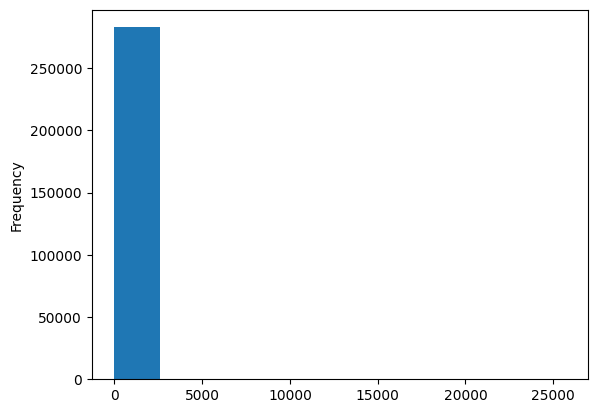

In [ ]:
fraud_data['Amount'].plot(kind='hist')

<Axes: ylabel='Frequency'>

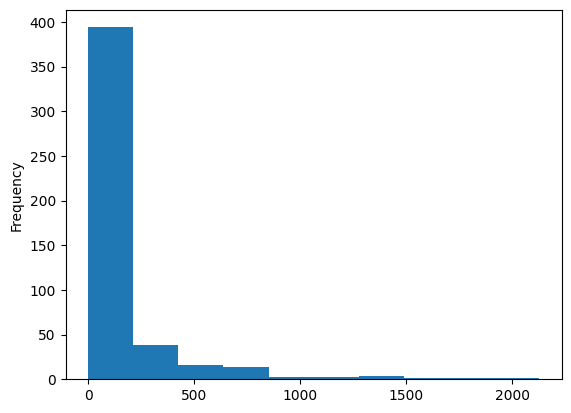

In [ ]:
legitimate_data['Amount'].plot(kind='hist')

<Axes: >

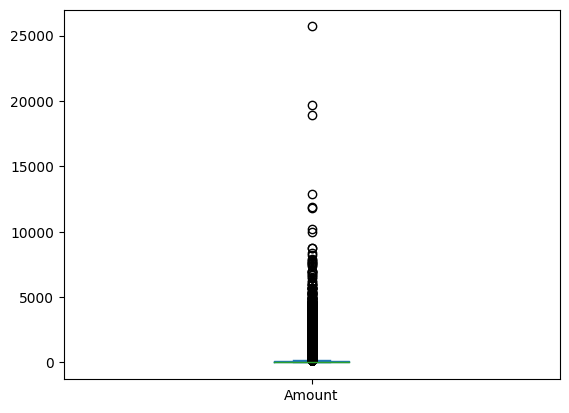

In [ ]:
fraud_data['Amount'].plot(kind='box')


<Axes: >

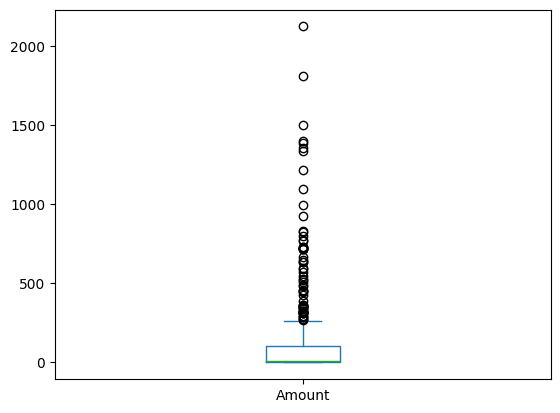

In [ ]:
legitimate_data['Amount'].plot(kind='box')

## Correlation amatrix for Imbalanced Data

In [ ]:
corr_imbalanced=df_new.corr()
corr_imbalanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


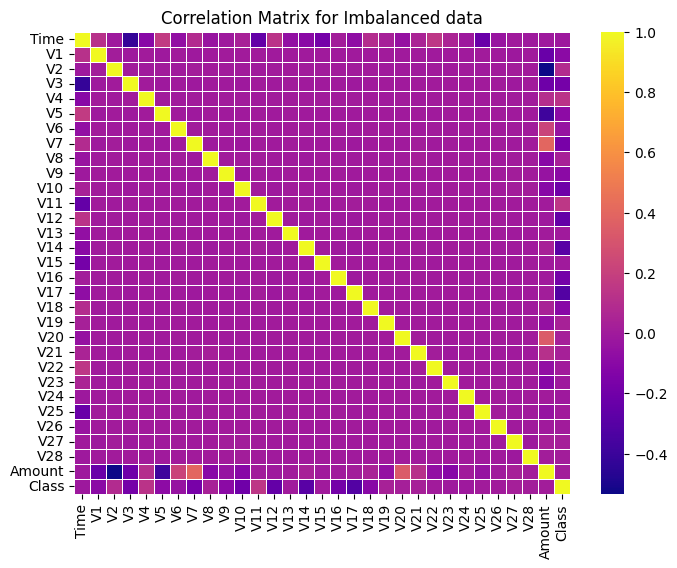

In [ ]:
corr_imbalanced = df_new.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_imbalanced,annot=False,cmap="plasma",linewidth=0.5)
plt.title("Correlation Matrix for Imbalanced data")
plt.show()

In [ ]:
corr_balanced=x_smote.corr()
corr_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.273492,-0.251632,0.180349,-0.229636,0.321561,0.144642,0.255955,-0.218025,0.186674,...,-0.067105,-0.070925,0.151280,0.082201,-0.001407,-0.227648,-0.054210,-0.171634,0.008341,0.017652
V1,0.273492,1.000000,-0.795612,0.881230,-0.618947,0.869583,0.413017,0.874994,-0.317405,0.653185,...,-0.357120,0.084711,-0.055573,0.039344,-0.063267,-0.147679,0.033127,0.046216,0.132605,-0.050025
V2,-0.251632,-0.795612,1.000000,-0.864740,0.691662,-0.801261,-0.405129,-0.838121,0.229731,-0.703782,...,0.402892,-0.088749,0.067728,0.030879,0.001566,0.148746,0.014995,-0.043272,0.014780,-0.237595
V3,0.180349,0.881230,-0.864740,1.000000,-0.774488,0.850188,0.530372,0.889691,-0.357230,0.753726,...,-0.384695,0.040726,-0.050619,0.028407,0.021998,-0.139494,-0.034897,-0.047200,0.080540,-0.014449
V4,-0.229636,-0.618947,0.691662,-0.774488,1.000000,-0.576184,-0.479727,-0.734745,0.175362,-0.794107,...,0.314543,-0.018087,0.140675,0.006486,-0.089442,-0.012868,0.148159,0.064045,-0.048353,-0.003073
V5,0.321561,0.869583,-0.801261,0.850188,-0.576184,1.000000,0.366113,0.843770,-0.398315,0.646173,...,-0.337726,0.035074,-0.051709,-0.012494,-0.120914,-0.154147,0.041958,0.043461,0.118114,-0.112626
V6,0.144642,0.413017,-0.405129,0.530372,-0.479727,0.366113,1.000000,0.389933,-0.536585,0.406328,...,-0.067052,-0.265296,0.197339,0.241014,0.000756,-0.177288,-0.039440,-0.246291,-0.088862,0.182058
V7,0.255955,0.874994,-0.838121,0.889691,-0.734745,0.843770,0.389933,1.000000,-0.130987,0.784121,...,-0.456495,0.186930,-0.215267,-0.006117,-0.039874,0.003606,-0.006605,0.110957,0.131298,0.121085
V8,-0.218025,-0.317405,0.229731,-0.357230,0.175362,-0.398315,-0.536585,-0.130987,1.000000,-0.133068,...,-0.167907,0.475601,-0.419288,-0.315769,0.062530,0.345718,0.014147,0.406331,0.071940,-0.001383
V9,0.186674,0.653185,-0.703782,0.753726,-0.794107,0.646173,0.406328,0.784121,-0.133068,1.000000,...,-0.376282,0.124782,-0.227650,-0.037926,0.020314,-0.007672,-0.128862,0.018220,0.105782,0.025328


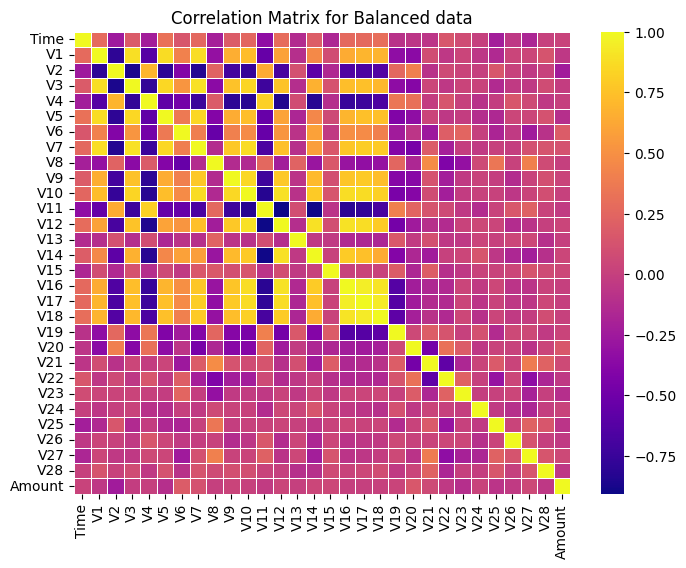

In [ ]:
corr_balanced = x_smote.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_balanced,annot=False,cmap="plasma",linewidth=0.5)
plt.title("Correlation Matrix for Balanced data")
plt.show()

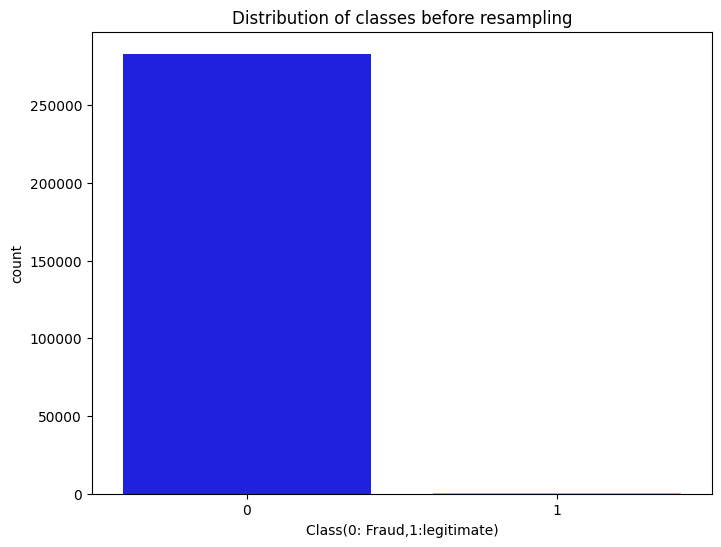

In [ ]:
custom_pallete=sns.color_palette(['blue','gold'])
plt.figure(figsize=(8,6))
sns.countplot(x=y,palette=custom_pallete)
plt.title('Distribution of classes before resampling')
plt.xlabel("Class(0: Fraud,1:legitimate)")
plt.ylabel("count")
plt.show()

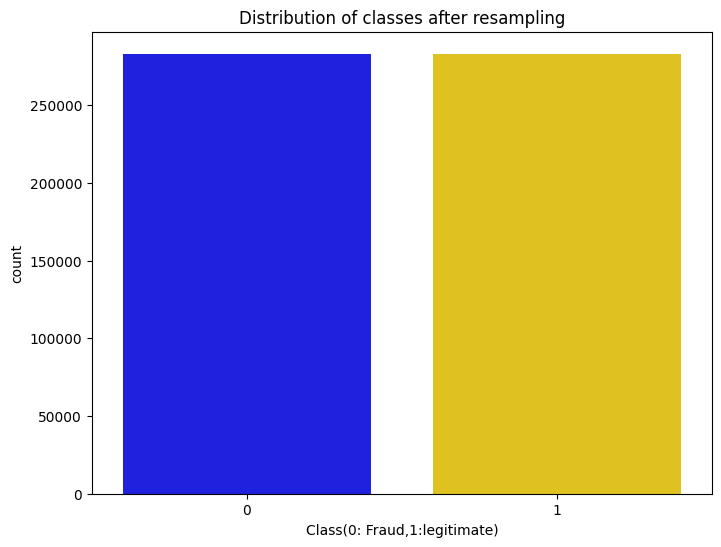

In [ ]:
custom_pallete=sns.color_palette(['blue','gold'])
plt.figure(figsize=(8,6))
sns.countplot(x=y_smote,palette=custom_pallete)
plt.title('Distribution of classes after resampling')
plt.xlabel("Class(0: Fraud,1:legitimate)")
plt.ylabel("count")
plt.show()

## Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Predictions

In [ ]:
y_pred = lr.predict(X_test)

## Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
classification_report_lr=classification_report(y_test,y_pred)
print(classification_report_lr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56635
           1       0.98      0.96      0.97     56667

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



In [ ]:
confusion_matrix_lr=confusion_matrix(y_test,y_pred)
confusion_matrix_lr

array([[55582,  1053],
       [ 2179, 54488]])

In [ ]:
confusion_matrix_df=pd.DataFrame(confusion_matrix_lr,columns=["Predicted Negative(0)", "Predicted Positive(1)"],index=["Actual Negative(0)","Actual Positive(1)"])
confusion_matrix_df

,Predicted Negative(0),Predicted Positive(1)
Actual Negative(0),55582,1053
Actual Positive(1),2179,54488


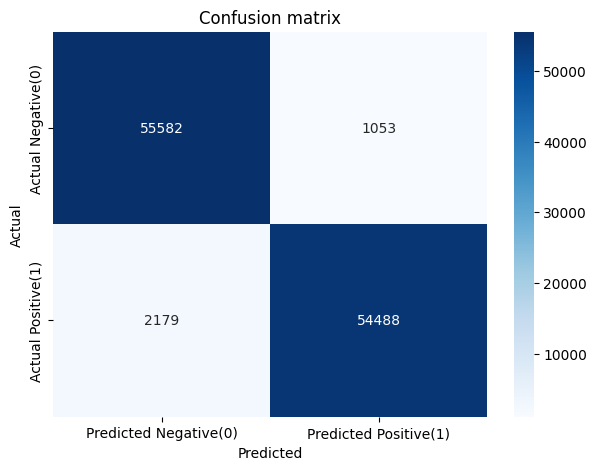

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_df,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()